# I. Giới thiệu về mô hình

Từ kết quả của quá trình gom cụm, ta đã phân khách hàng ra thành 3 cụm với những đặc tính riêng biệt. Bây giờ, ta sẽ xây dựng một mô hình phân lớp với biến mục tiêu là Cụm mà khách hàng thuộc về. 

Từ đó, khi có thêm thông tin về khách hàng mới, ta có thể dự đoán khách hàng thuộc về cụm nào để có các chiến lược kinh doanh phù hợp

# II. Mô hình hoá

## 1. Import các thư viện cần thiết

In [55]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
import seaborn as sns
import matplotlib.pyplot as plt

## 2. Đọc dữ liệu từ file đã xử lý

In [56]:
df = pd.read_csv('./data/marketing_campaign_modeling.csv')
df.head()

,Education,Income,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,Response,Age,Age Group,Kids,Total Purchases,Spent,Family Size,Marital_Status_In Relationship,Marital_Status_Single,Cluster
0,-0.792105,0.288947,1.529793,0.306856,0.983228,1.554170,1.679746,2.461068,1.475396,0.845669,...,2.386338,1.016868,0.474103,-1.264308,1.319340,1.680176,-1.758810,-1.347635,1.347635,2
1,-0.792105,-0.262003,-1.191143,-0.383971,-0.871064,-0.636431,-0.713455,-0.650414,-0.631638,-0.729742,...,-0.419052,1.273264,1.639042,1.395139,-1.155857,-0.962202,0.445618,-1.347635,1.347635,1
2,-0.792105,0.918423,-0.206659,-0.798467,0.362159,0.572177,-0.177201,1.344595,-0.147262,-0.038098,...,-0.419052,0.333146,0.474103,-1.264308,0.798246,0.282541,-0.656596,0.742041,-0.742041,0
3,-0.792105,-1.182183,-1.062517,-0.798467,-0.871064,-0.560893,-0.651409,-0.503991,-0.583200,-0.748954,...,-0.419052,-1.290693,-0.690836,0.065416,-0.895310,-0.918994,0.445618,0.742041,-0.742041,1
4,1.590069,0.296187,-0.953679,1.550344,-0.389661,0.421101,-0.217088,0.154911,-0.001950,-0.556831,...,-0.419052,-1.034298,-0.690836,0.065416,0.537699,-0.305762,0.445618,0.742041,-0.742041,0


In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2236 entries, 0 to 2235
Data columns (total 31 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Education                       2236 non-null   float64
 1   Income                          2236 non-null   float64
 2   Dt_Customer                     2236 non-null   float64
 3   Recency                         2236 non-null   float64
 4   MntWines                        2236 non-null   float64
 5   MntFruits                       2236 non-null   float64
 6   MntMeatProducts                 2236 non-null   float64
 7   MntFishProducts                 2236 non-null   float64
 8   MntSweetProducts                2236 non-null   float64
 9   MntGoldProds                    2236 non-null   float64
 10  NumDealsPurchases               2236 non-null   float64
 11  NumWebPurchases                 2236 non-null   float64
 12  NumCatalogPurchases             22

Dữ liệu đã được xử lý phù hợp với việc mô hình hoá

## 3. Lựa chọn đặc trưng

<Axes: >

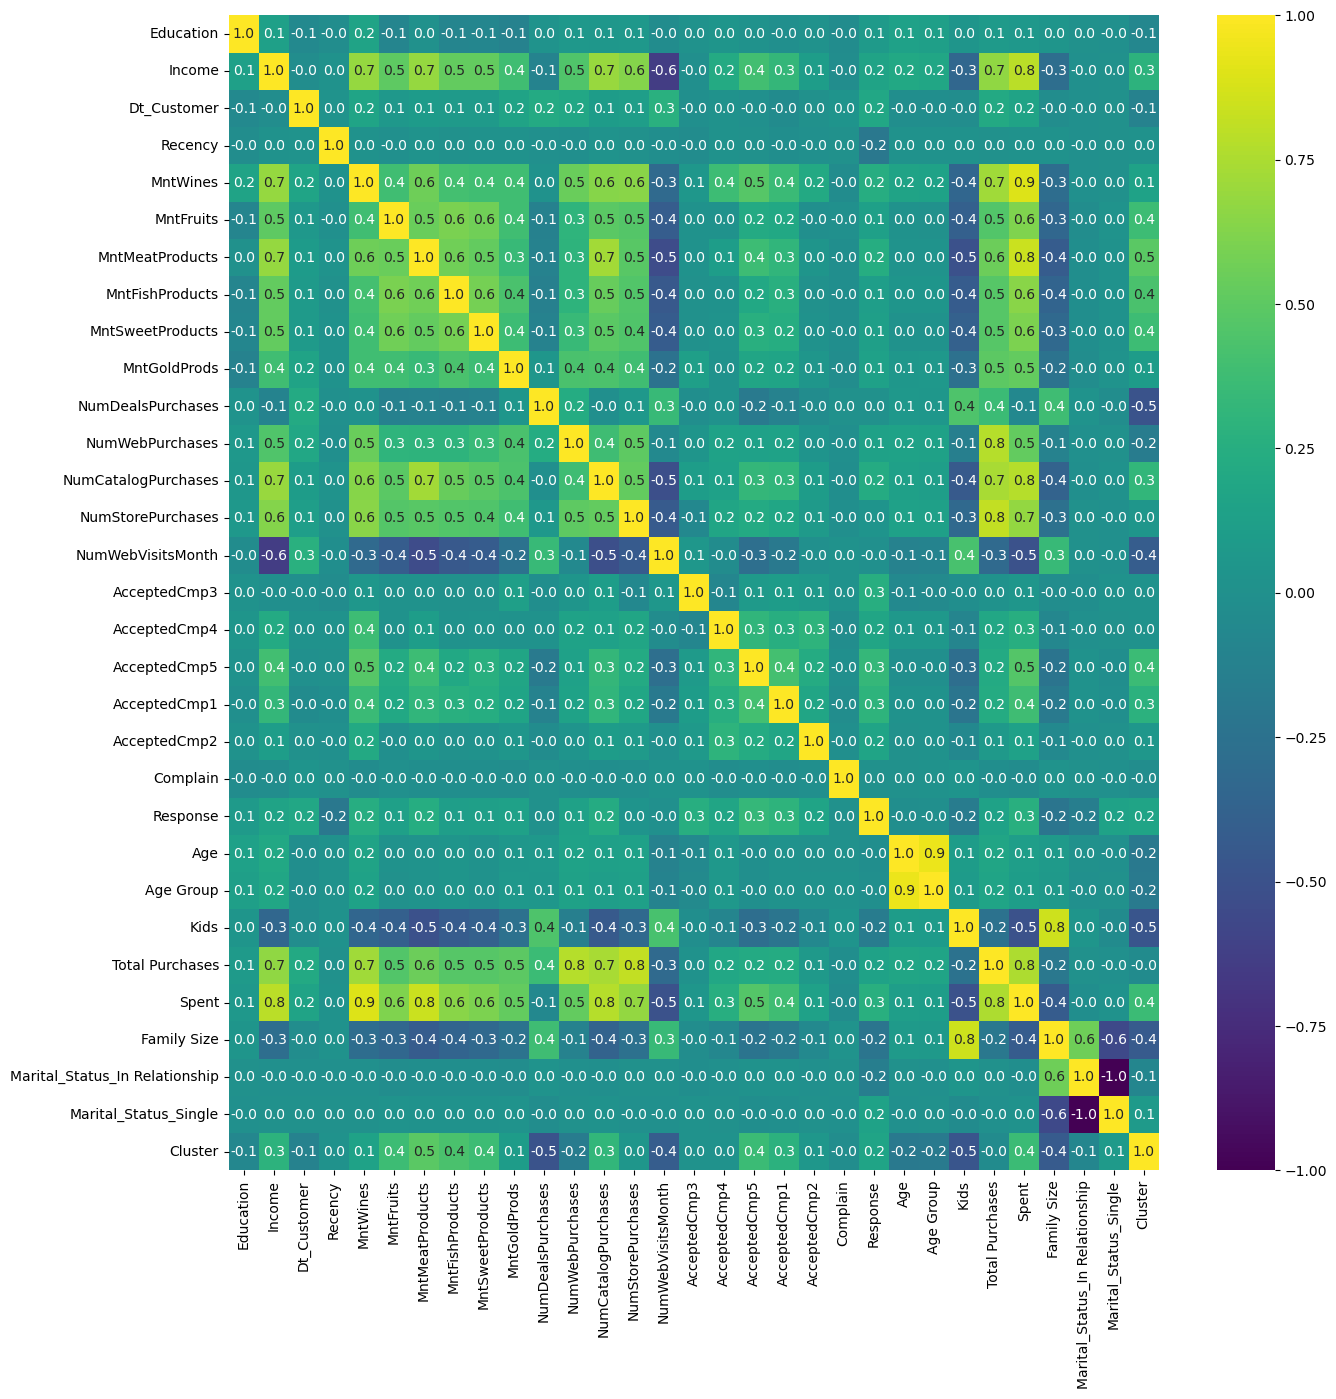

In [58]:
plt.figure(figsize=(15, 15))
sns.heatmap(df.corr(), annot=True, fmt='.1f', cmap='viridis')

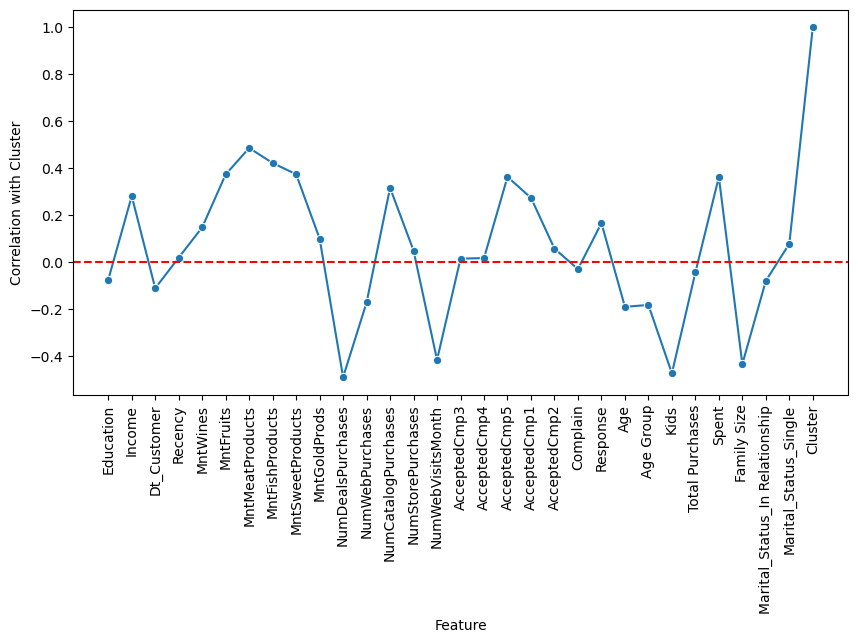

In [59]:
plt.figure(figsize=(10, 5))
sns.lineplot(df.corr()['Cluster'], marker='o');
plt.xlabel('Feature')
plt.ylabel('Correlation with Cluster')
plt.axhline(0, color='red', linestyle='--')  # Add a horizontal line at y=0
plt.xticks(rotation=90);

Ta sẽ bỏ đi các features có ít độ tương quan với biến mục tiêu, bao gồm:

- Recency

- AcceptedCmp4

- Complain

- Marital_Status_Single

- Marital_Status_In Relationship

In [60]:
df.drop(['Recency', 'AcceptedCmp4', 'Complain', 'Marital_Status_Single', 'Marital_Status_In Relationship'], axis=1, inplace=True)
df.head()

,Education,Income,Dt_Customer,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,...,AcceptedCmp1,AcceptedCmp2,Response,Age,Age Group,Kids,Total Purchases,Spent,Family Size,Cluster
0,-0.792105,0.288947,1.529793,0.983228,1.554170,1.679746,2.461068,1.475396,0.845669,0.348738,...,-0.262362,-0.116616,2.386338,1.016868,0.474103,-1.264308,1.319340,1.680176,-1.758810,2
1,-0.792105,-0.262003,-1.191143,-0.871064,-0.636431,-0.713455,-0.650414,-0.631638,-0.729742,-0.168700,...,-0.262362,-0.116616,-0.419052,1.273264,1.639042,1.395139,-1.155857,-0.962202,0.445618,1
2,-0.792105,0.918423,-0.206659,0.362159,0.572177,-0.177201,1.344595,-0.147262,-0.038098,-0.686137,...,-0.262362,-0.116616,-0.419052,0.333146,0.474103,-1.264308,0.798246,0.282541,-0.656596,0
3,-0.792105,-1.182183,-1.062517,-0.871064,-0.560893,-0.651409,-0.503991,-0.583200,-0.748954,-0.168700,...,-0.262362,-0.116616,-0.419052,-1.290693,-0.690836,0.065416,-0.895310,-0.918994,0.445618,1
4,1.590069,0.296187,-0.953679,-0.389661,0.421101,-0.217088,0.154911,-0.001950,-0.556831,1.383614,...,-0.262362,-0.116616,-0.419052,-1.034298,-0.690836,0.065416,0.537699,-0.305762,0.445618,0


## 4. Huấn luyện và đánh giá

**Lựa chọn mô hình**

Vì đây thuộc về bài toán phân lớp nên ta sẽ sử dụng một mô hình tiêu biểu là Decision Tree, tuy nhiên để nâng cao khả năng tổng quát hoá thì ta có thể dùng Random Forest

Để đảm bảo mô hình được học nhiều nhất có thể, ta sẽ dùng cross validation (10-folds)

Xem số lượng các cluster

In [61]:
df['Cluster'].value_counts()

1    1062
0     618
2     556
Name: Cluster, dtype: int64

Số lượng giữa các cluster không bị chênh lệch quá lớn, nên có thể dùng Accuracy để đánh giá

In [62]:
X = df.drop('Cluster', axis=1)
y = df['Cluster']

In [63]:
model = RandomForestClassifier(random_state=42)
scores = cross_val_score(model, X, y, cv=10, scoring='accuracy')

In [64]:
scores

array([0.95982143, 0.98660714, 0.9375    , 0.97767857, 0.95089286,
       0.95982143, 0.98206278, 0.96412556, 0.93273543, 0.93721973])

**Accuray trung bình**

In [65]:
scores.mean()

0.9588464926329276

**Nhận xét**

- Hiệu suất của mô hình tương đối cao

- Giữa các splits thì hiệu suất không chênh lệch nhiều, cho thấy sự ổn định của mô hình

- Với mô hình này, ta có thể dùng để phân loại một khách hàng mới vào nhóm thích hợp với độ chính xác cao